Cluster Descriptions (Ward Linkage):
Clusters based on Ward linkage interpretation.
Cluster Descriptions (Single Linkage):
Clusters based on Single linkage interpretation.
Cluster Descriptions (Complete Linkage):
Clusters based on Complete linkage interpretation.
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



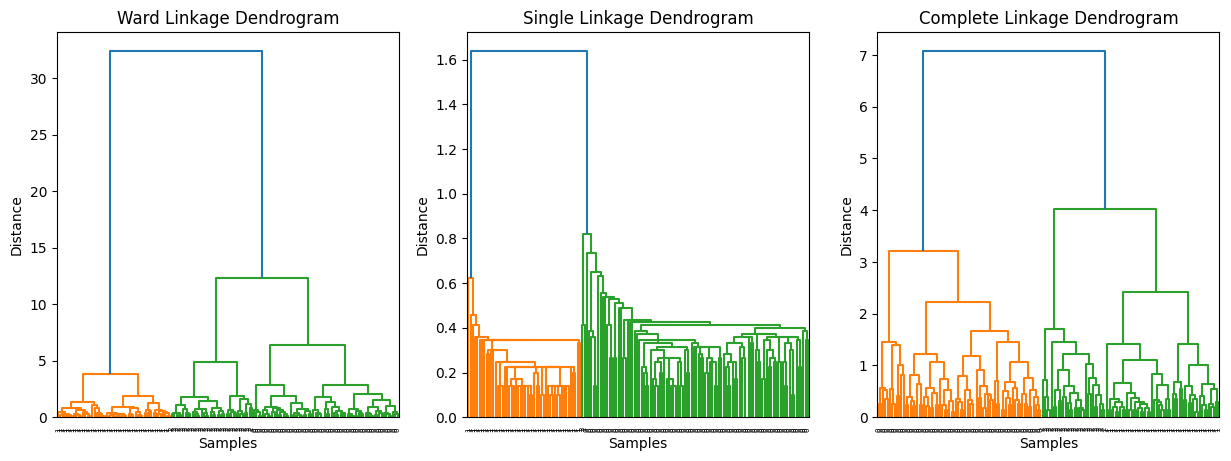

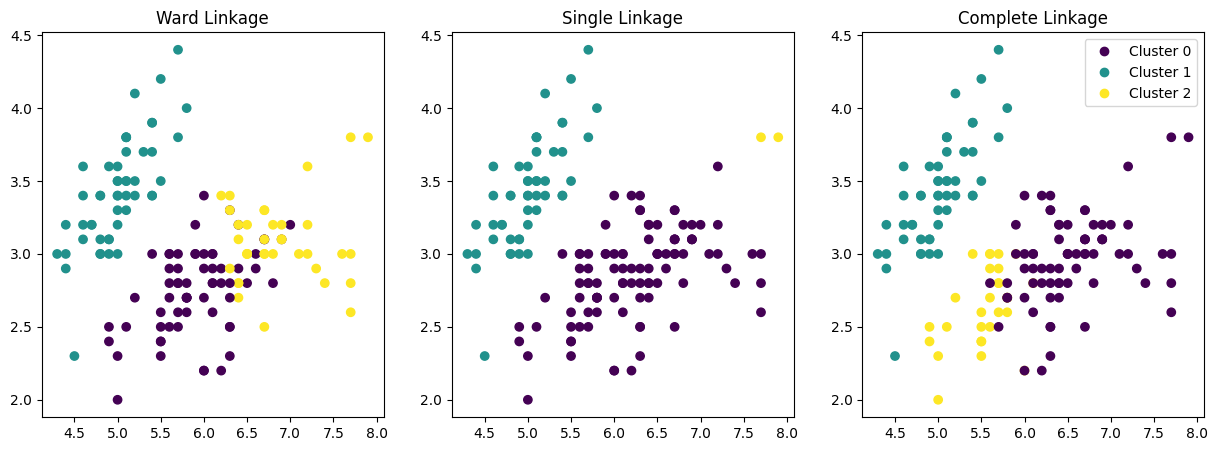

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 1: Hierarchical Clustering with Different Linkage Methods and Draw Dendrograms
n_clusters = 3  # Number of clusters
linkage_methods = ['ward', 'single', 'complete']  # Different linkage methods
cluster_labels = []

# Define figure and axes for dendrograms
plt.figure(figsize=(15, 5))
dendrogram_axes = []

for i, linkage_method in enumerate(linkage_methods):
    labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method).fit_predict(X)
    cluster_labels.append(labels)

    # Create a dendrogram for the current linkage method
    dendrogram_data = linkage(X, method=linkage_method)
    dendrogram_axes.append(plt.subplot(1, len(linkage_methods), i + 1))
    dendrogram(dendrogram_data, orientation='top', labels=labels)
    plt.title(f"{linkage_method.capitalize()} Linkage Dendrogram")
    plt.xlabel('Samples')
    plt.ylabel('Distance')

# Plot the clustering results for different linkage methods
plt.figure(figsize=(15, 5))
for i, linkage_method in enumerate(linkage_methods):
    plt.subplot(1, len(linkage_methods), i + 1)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels[i], cmap='viridis', 
                          label=f'Clusters ({linkage_method.capitalize()} Linkage)')
    plt.title(f"{linkage_method.capitalize()} Linkage")

# Add a legend to the scatter plots
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(n_clusters)])

# Step 2: Feature Engineering (Using cluster assignment as a feature)
X_with_cluster = np.column_stack((X, cluster_labels[-1]))  # Using complete linkage

# Step 3: Classification
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Step 4: Prediction
y_pred = classifier.predict(X_test)

# Step 5: Test Score and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=0)

# Print cluster descriptions
cluster_descriptions = {
    'ward': 'Clusters based on Ward linkage interpretation.',
    'single': 'Clusters based on Single linkage interpretation.',
    'complete': 'Clusters based on Complete linkage interpretation.'
}

for method in linkage_methods:
    print(f"Cluster Descriptions ({method.capitalize()} Linkage):")
    print(cluster_descriptions[method.lower()])  # Convert to lowercase for dictionary access

# Print accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

plt.show()
